In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Paths
gold_folder = "/Workspace/social media/Gold"
viz_folder = "/Workspace/social media/Visualizations"
os.makedirs(viz_folder, exist_ok=True)

# Load Gold tables
dim_article = pd.read_csv(f"{gold_folder}/dim_article.csv")
dim_source = pd.read_csv(f"{gold_folder}/dim_source.csv")
dim_date = pd.read_csv(f"{gold_folder}/dim_date.csv")
fact_news = pd.read_csv(f"{gold_folder}/fact_news.csv")

print("Gold Tables Loaded:")
print("dim_article:", dim_article.shape)
print("dim_source:", dim_source.shape)
print("dim_date:", dim_date.shape)
print("fact_news:", fact_news.shape)




Gold Tables Loaded:
dim_article: (10, 5)
dim_source: (9, 2)
dim_date: (1, 2)
fact_news: (10, 5)


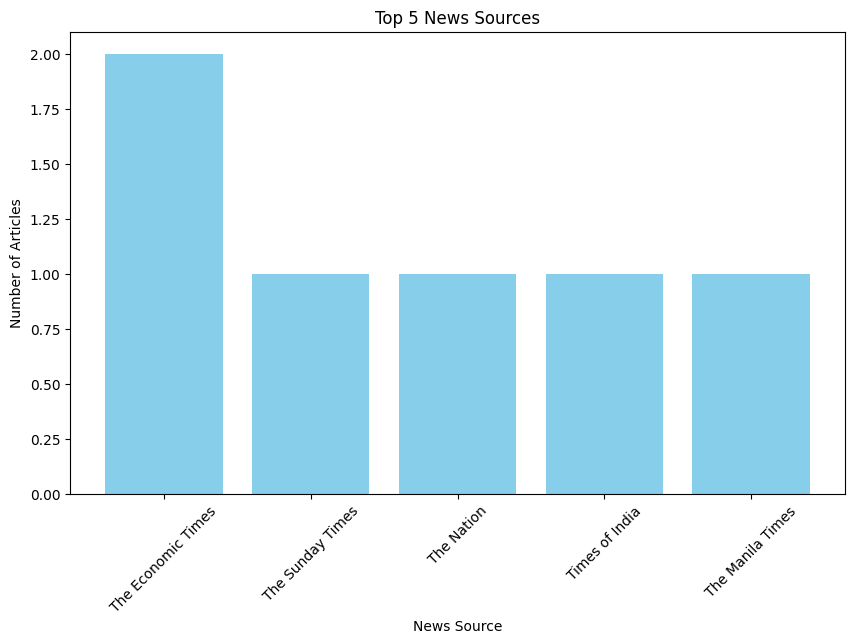

Saved: /Workspace/social media/Visualizations/top_sources.png


In [0]:
# Merge fact with source
df_source = fact_news.merge(dim_source, left_on="source_id", right_on="source_id", how="left")

# Count articles per source
source_count = df_source["source.name"].value_counts().head(5)

plt.figure(figsize=(10,6))
plt.bar(source_count.index, source_count.values, color="skyblue")
plt.xticks(rotation=45)
plt.title("Top 5 News Sources")
plt.ylabel("Number of Articles")
plt.xlabel("News Source")

path = f"{viz_folder}/top_sources.png"
plt.savefig(path, bbox_inches="tight")
plt.show()
print("Saved:", path)


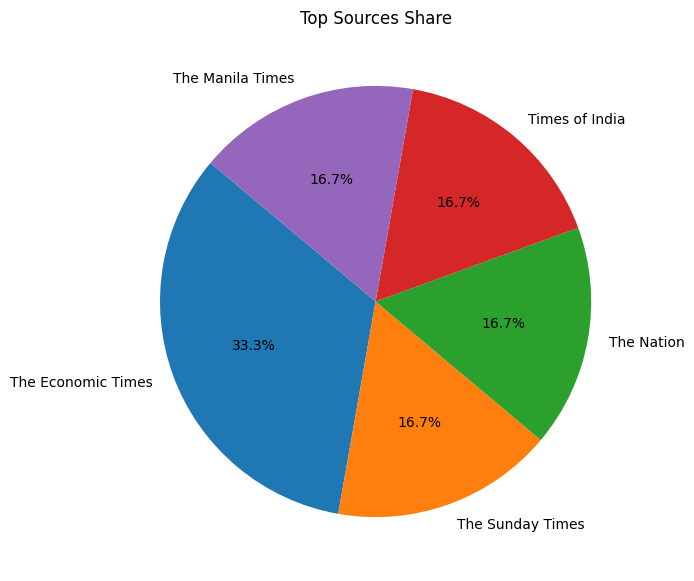

Saved: /Workspace/social media/Visualizations/pie_top_sources.png


In [0]:
top_sources = df_source["source.name"].value_counts().head(5)

plt.figure(figsize=(7,7))
plt.pie(top_sources.values, labels=top_sources.index, autopct="%1.1f%%", startangle=140)
plt.title("Top Sources Share")
path = f"{viz_folder}/pie_top_sources.png"
plt.savefig(path, bbox_inches="tight")
plt.show()
print("Saved:", path)


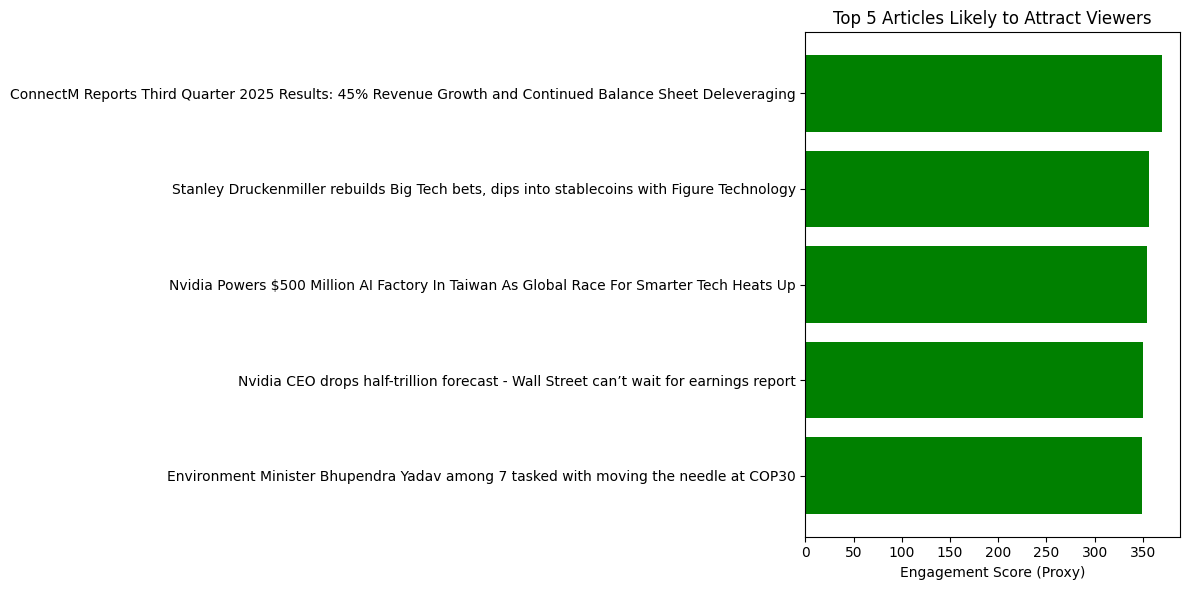

Saved: /Workspace/social media/Visualizations/top_articles_viewers.png


In [0]:
dim_article["engagement_score"] = dim_article["title"].str.len() + dim_article["content"].str.len()
top_articles = dim_article.sort_values("engagement_score", ascending=False).head(5)

plt.figure(figsize=(12,6))
plt.barh(top_articles["title"], top_articles["engagement_score"], color="green")
plt.xlabel("Engagement Score (Proxy)")
plt.title("Top 5 Articles Likely to Attract Viewers")
plt.gca().invert_yaxis()
plt.tight_layout()
path = f"{viz_folder}/top_articles_viewers.png"
plt.savefig(path)
plt.show()
print("Saved:", path)
